<a href="https://colab.research.google.com/github/leobezlel/excelr-assignments/blob/main/Assignment_19(Timeseries).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
df = pd.read_csv('exchange_rate.csv')
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [ ]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [ ]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [ ]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=7588, step=1)

In [ ]:
sea = seasonal_decompose(df['Ex_rate'], model = 'multiplicative', period = 365)

<Axes: >

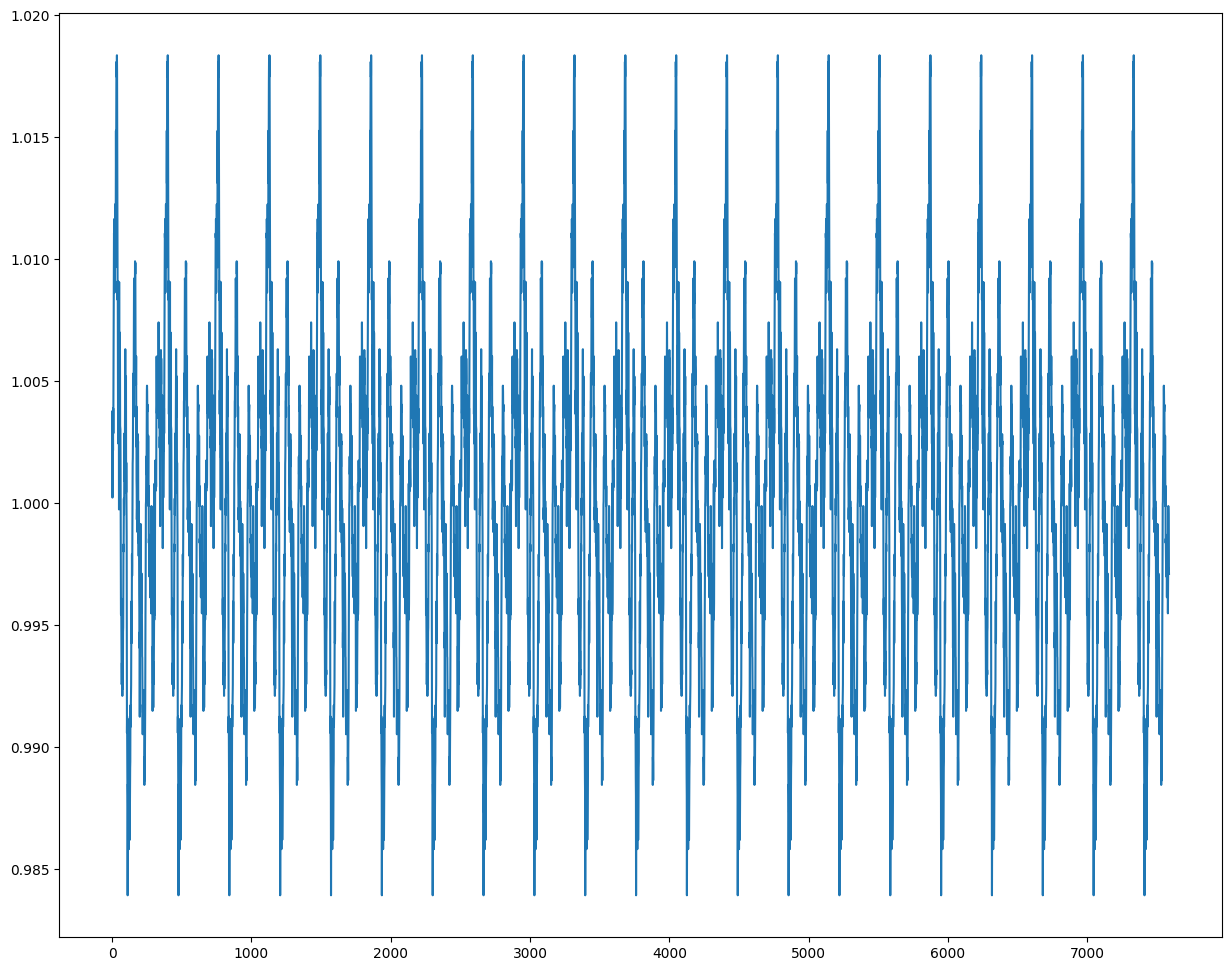

In [ ]:
sea.seasonal.plot(figsize = (15,12))

<Axes: >

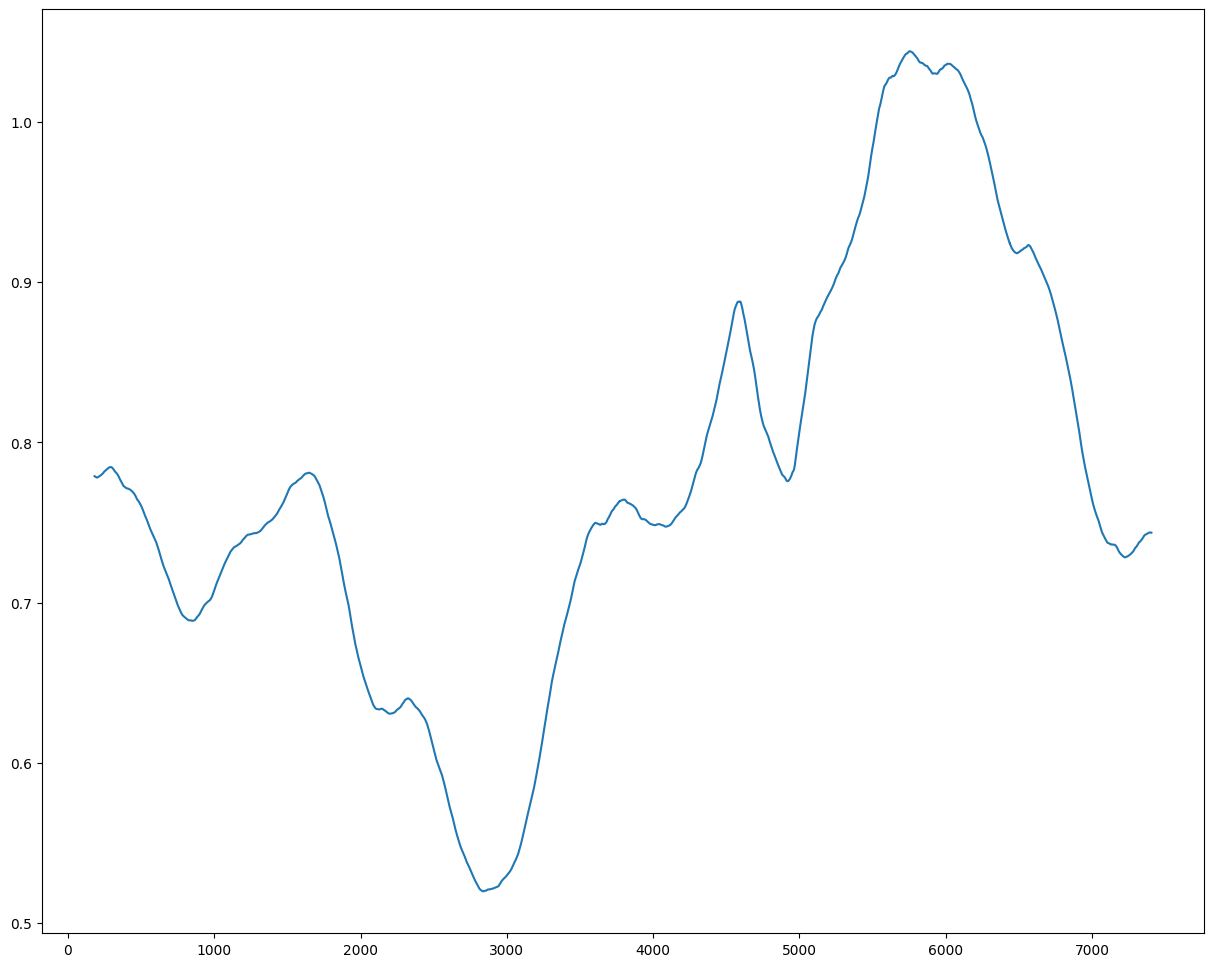

In [ ]:
sea.trend.plot(figsize = (15, 12))

<Axes: >

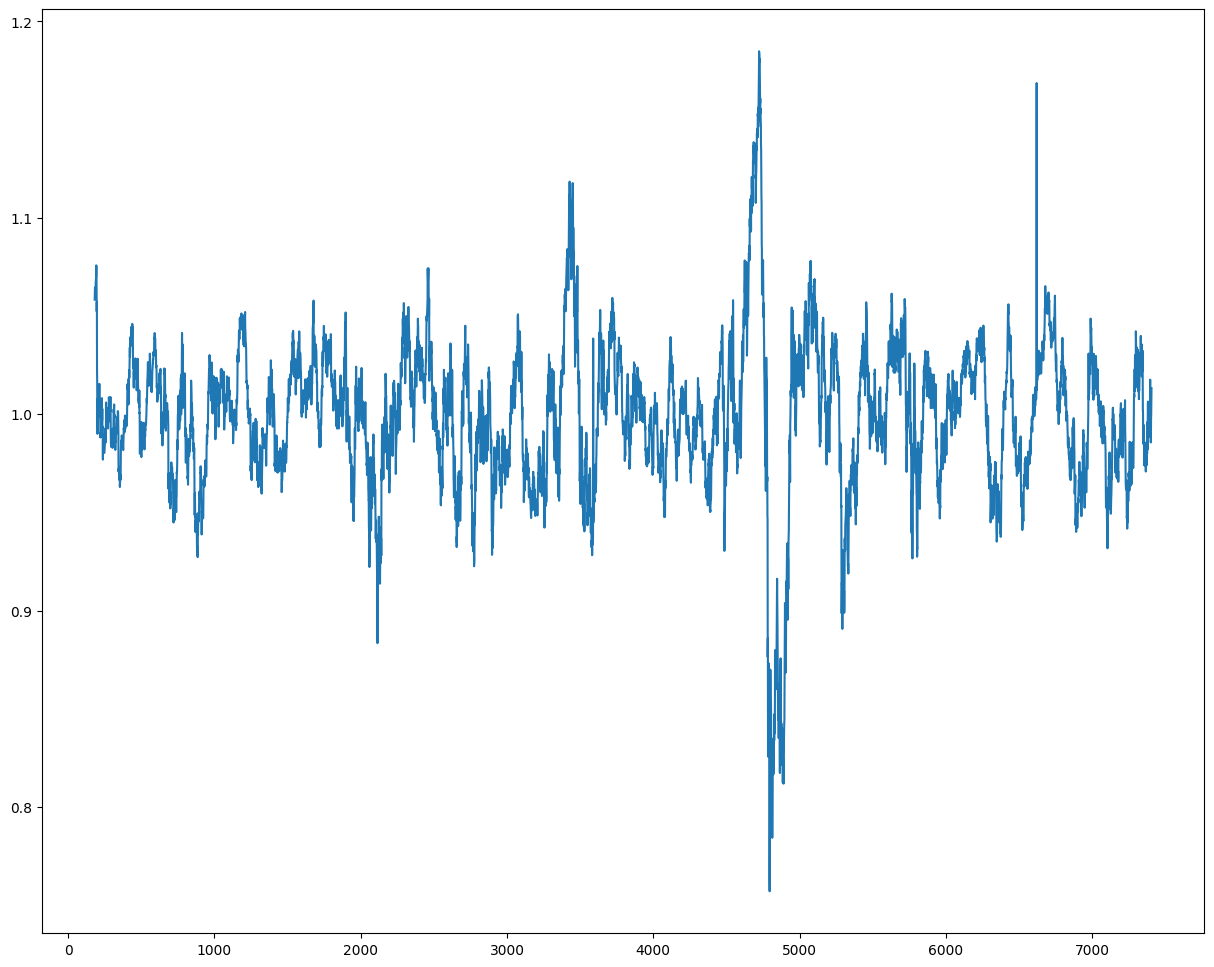

In [ ]:
sea.resid.plot(figsize = (15, 12))

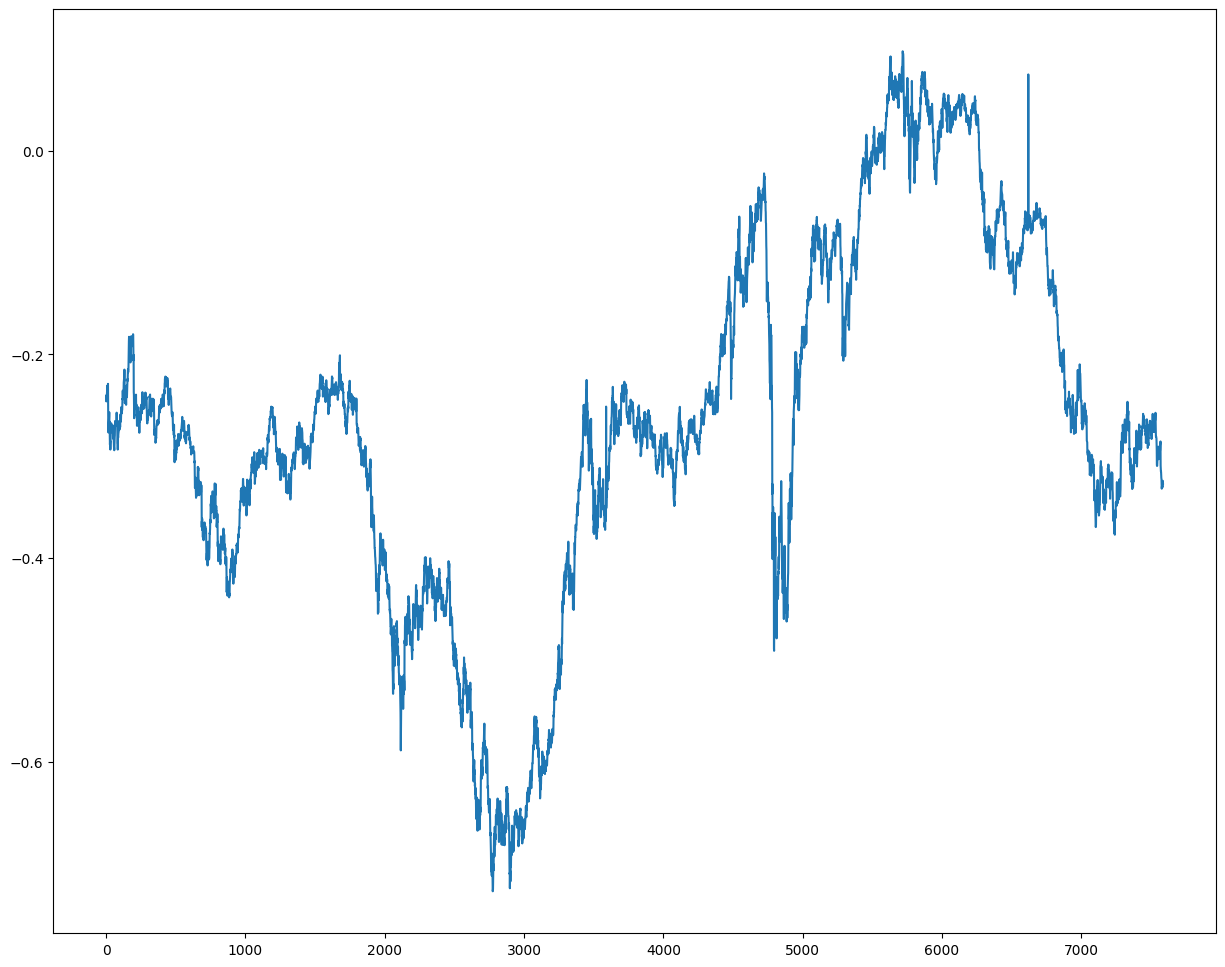

In [ ]:
ts_data = df['Ex_rate']
ts_data_log = np.log(ts_data)
plt.figure(figsize = (15, 12))
plt.plot(ts_data_log)

In [ ]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   -1.664994
p-value                           0.449233
#Lags Used                        1.000000
Number of Observations Used    7586.000000
Critical Value (1%)              -3.431212
Critical Value (5%)              -2.861921
Critical Value (10%)             -2.566973
dtype: float64


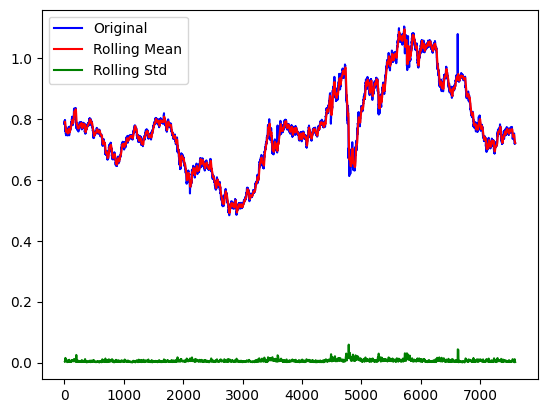

In [ ]:
test_stationarity(df['Ex_rate'])

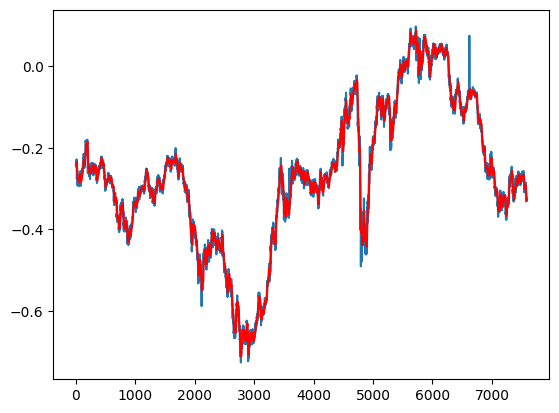

In [ ]:
movingAverage = ts_data_log.rolling(window = 12).mean()
movingSTD = ts_data_log.rolling(window = 12).std()
plt.plot(ts_data_log)
plt.plot(movingAverage,color='red')

In [ ]:
ts_data_log_diff = ts_data_log - movingAverage
ts_data_log_diff.head(15)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11    0.007278
12    0.005678
13    0.006632
14   -0.017983
Name: Ex_rate, dtype: float64

In [ ]:
ts_data_log_diff.dropna(inplace=True)
ts_data_log_diff.shape

(7577,)

Results of Dickey-Fuller Test :

Test Statistic                -1.404275e+01
p-value                        3.281274e-26
#Lags Used                     2.900000e+01
Number of Observations Used    7.547000e+03
Critical Value (1%)           -3.431217e+00
Critical Value (5%)           -2.861923e+00
Critical Value (10%)          -2.566974e+00
dtype: float64


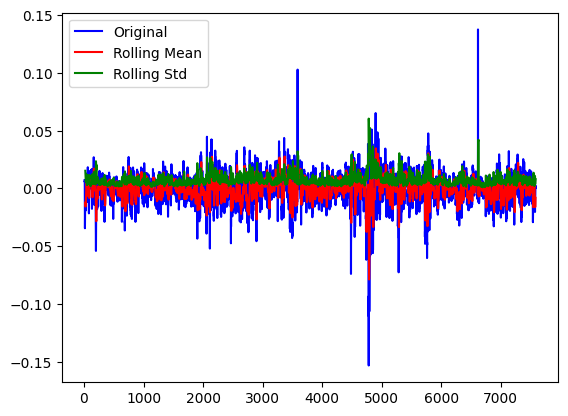

In [ ]:
test_stationarity(ts_data_log_diff)

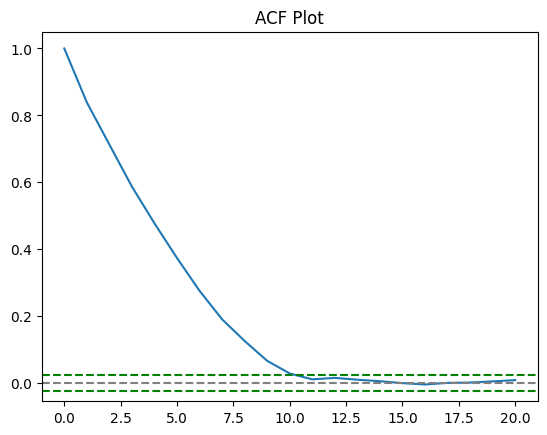

In [ ]:
# Plotting the ACF curve

plt.plot(np.arange(0,21), acf(ts_data_log_diff, nlags = 20))
plt.axhline(y=0, linestyle = '--', color = 'gray')

#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.title('ACF Plot')
plt.show()

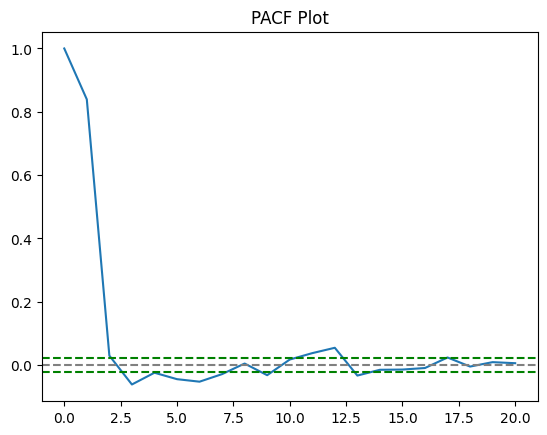

In [ ]:
# Plotting the PACF curve

plt.plot(np.arange(0,21), pacf(ts_data_log_diff, nlags = 20))
plt.axhline(y=0, linestyle = '--', color = 'gray')

#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.title('PACF Plot')
plt.show()

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Ex_rate'], order=(1,1,1))

In [ ]:
result = model.fit()

<Axes: >

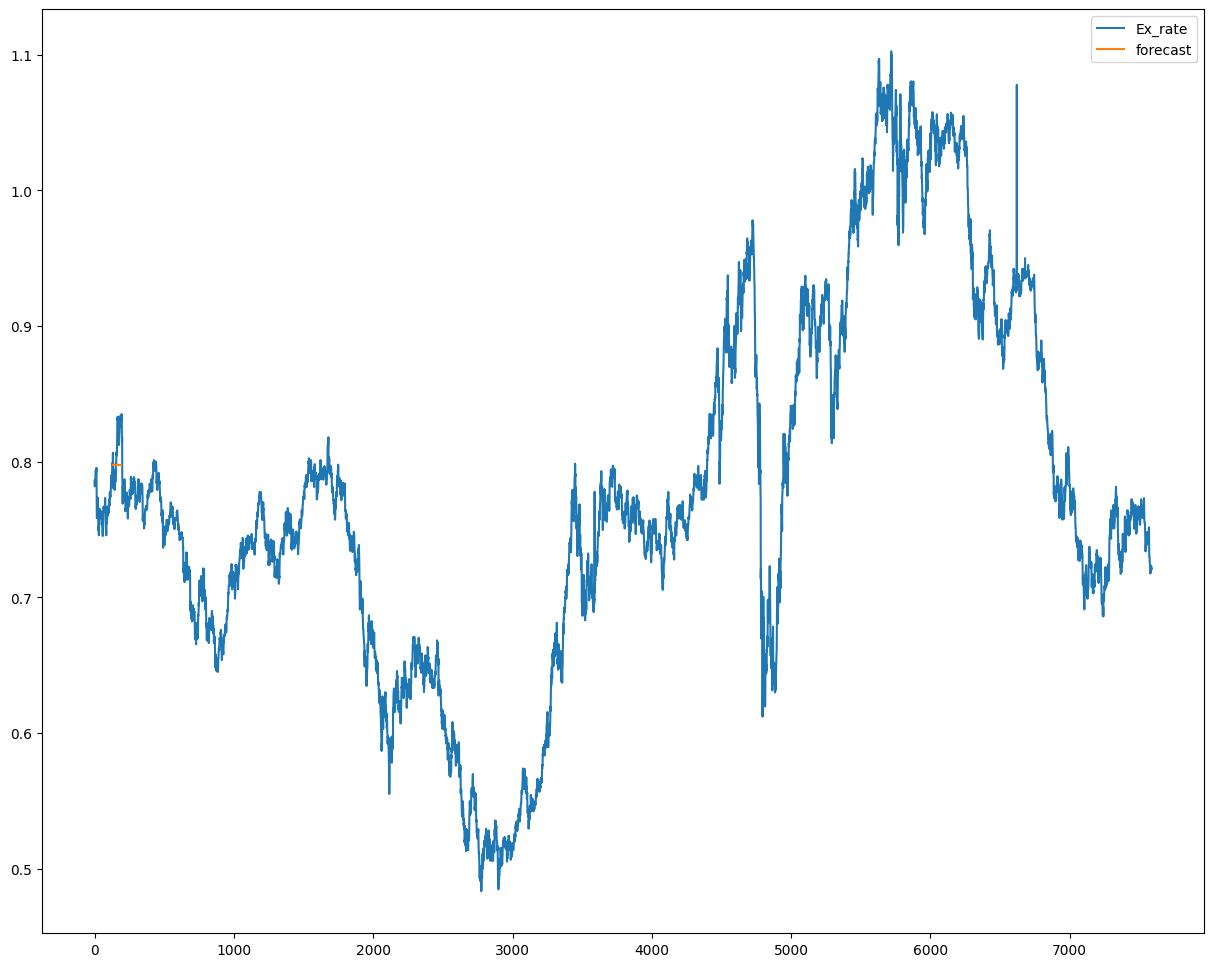

In [ ]:
df['forecast']= result.predict(start=130,end=190,dynamic=True)
df[['Ex_rate','forecast']].plot(figsize=(15,12))

In [ ]:
result.predict()

0       0.000000
1       0.785500
2       0.782286
3       0.786058
4       0.786089
          ...   
7583    0.718837
7584    0.718522
7585    0.721400
7586    0.723017
7587    0.721136
Name: predicted_mean, Length: 7588, dtype: float64

In [ ]:
result.forecast(steps=30)

7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
7598    0.720826
7599    0.720826
7600    0.720826
7601    0.720826
7602    0.720826
7603    0.720826
7604    0.720826
7605    0.720826
7606    0.720826
7607    0.720826
7608    0.720826
7609    0.720826
7610    0.720826
7611    0.720826
7612    0.720826
7613    0.720826
7614    0.720826
7615    0.720826
7616    0.720826
7617    0.720826
Name: predicted_mean, dtype: float64

In [ ]:
result.forecast(steps=30)

7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
7598    0.720826
7599    0.720826
7600    0.720826
7601    0.720826
7602    0.720826
7603    0.720826
7604    0.720826
7605    0.720826
7606    0.720826
7607    0.720826
7608    0.720826
7609    0.720826
7610    0.720826
7611    0.720826
7612    0.720826
7613    0.720826
7614    0.720826
7615    0.720826
7616    0.720826
7617    0.720826
Name: predicted_mean, dtype: float64

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

model = SimpleExpSmoothing(df['Ex_rate'])


In [ ]:
fit1 = model.fit()
pred1 = fit1.forecast(9)

fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(9)

fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast(9)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


<Axes: >

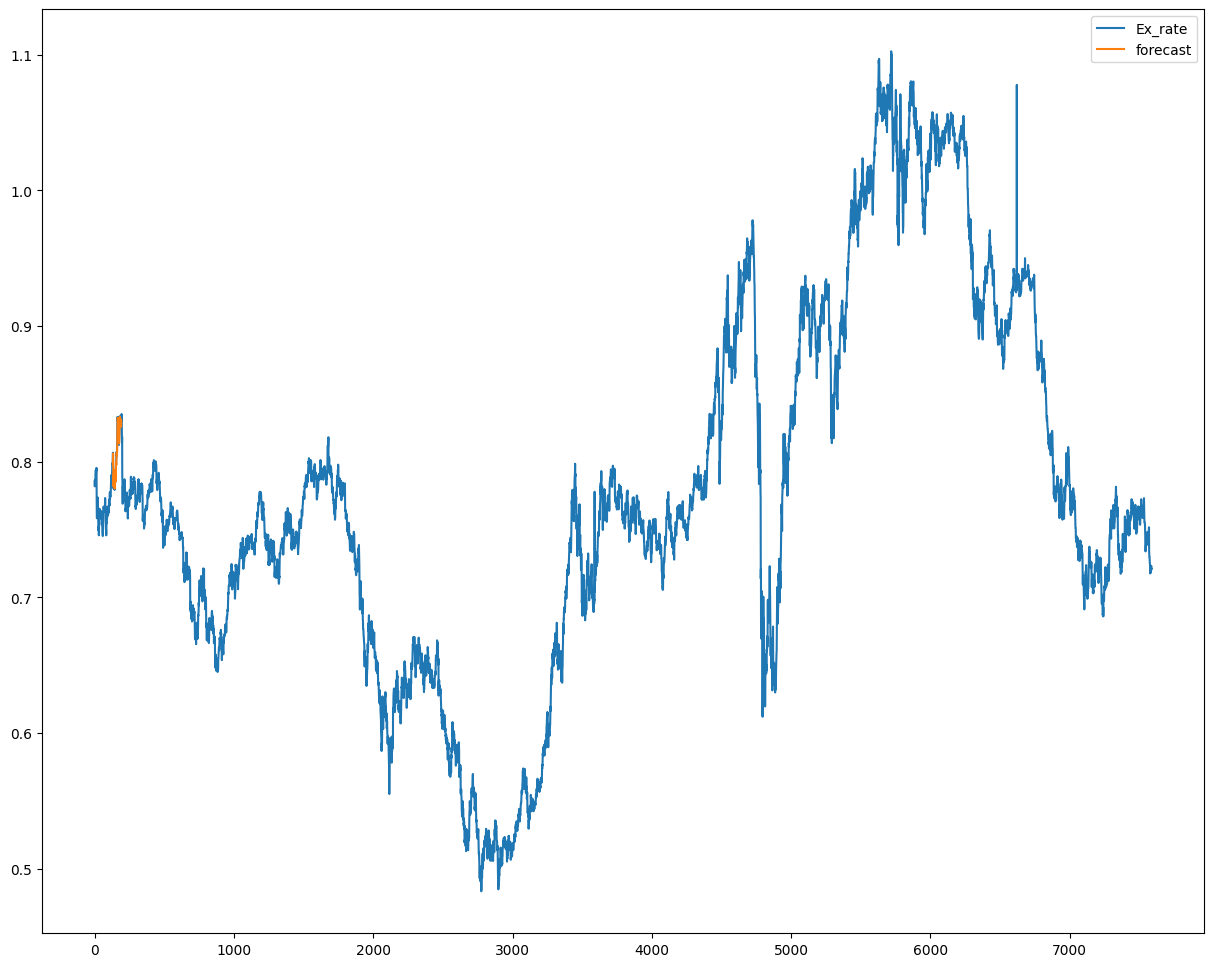

In [ ]:
df['forecast'] = fit1.predict(start=130,end=190)
df[['Ex_rate','forecast']].plot(figsize=(15,12))

<Axes: >

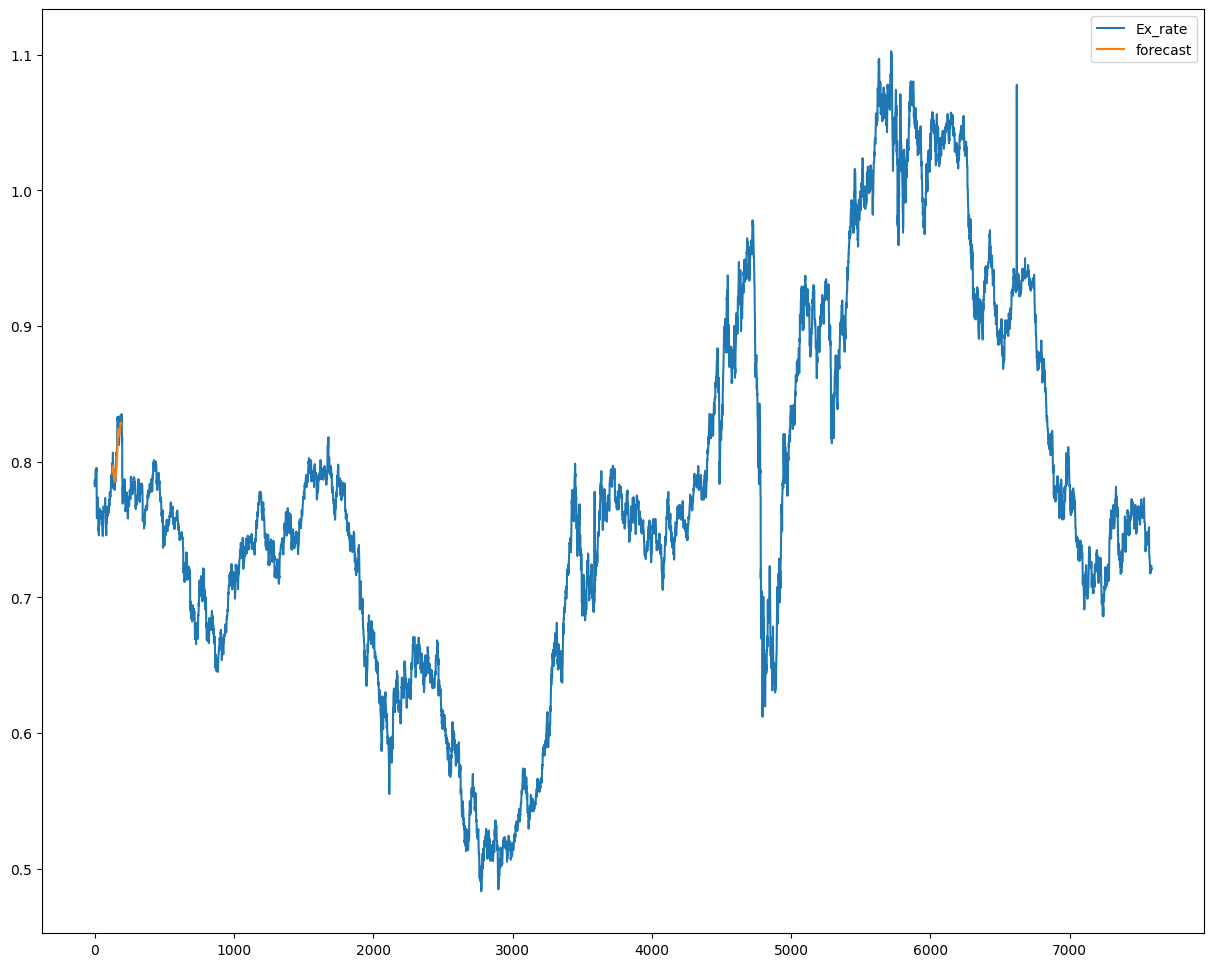

In [ ]:
df['forecast'] = fit2.predict(start=130,end=190)
df[['Ex_rate','forecast']].plot(figsize=(15,12))

<Axes: >

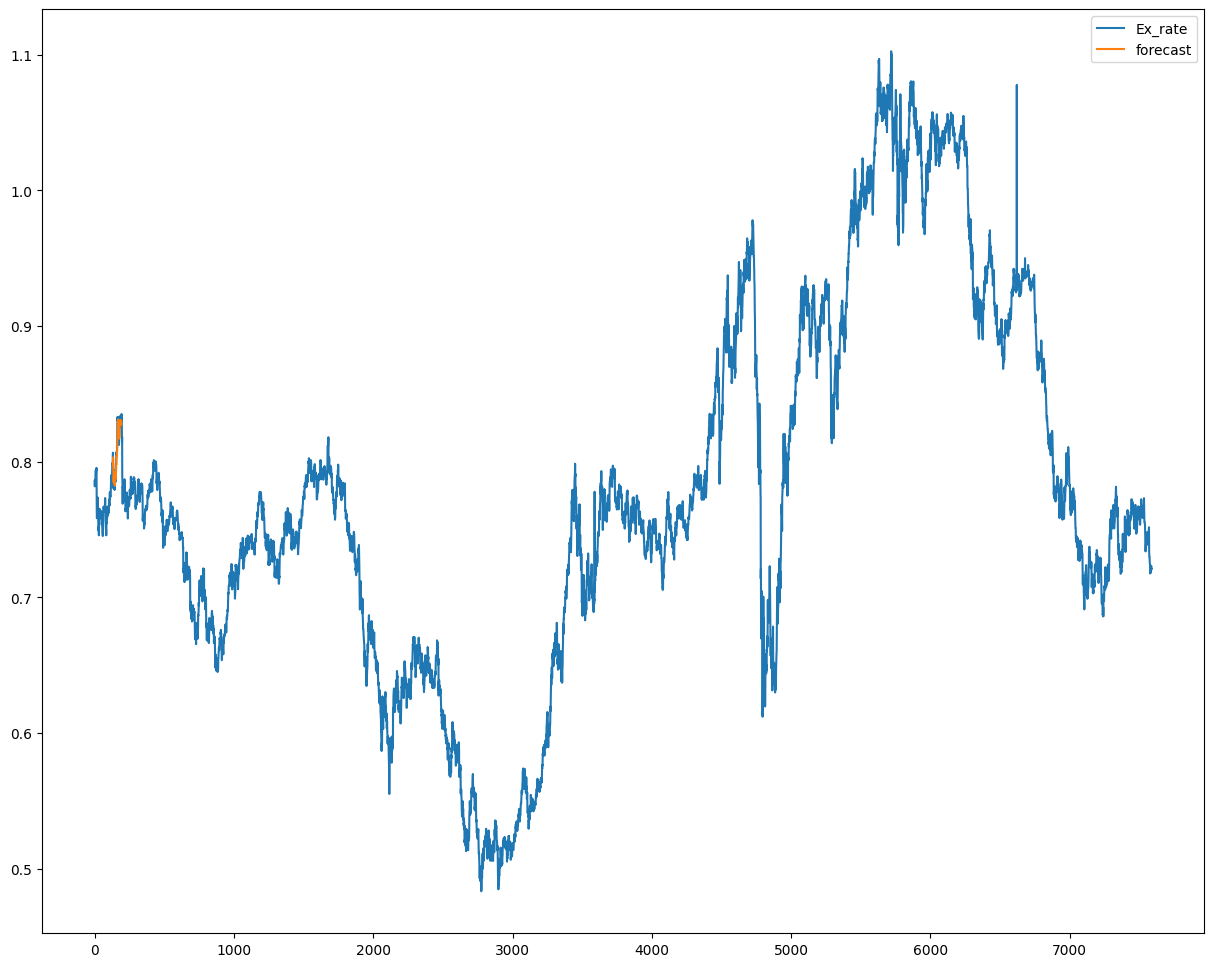

In [ ]:
df['forecast'] = fit3.predict(start=130,end=190)
df[['Ex_rate','forecast']].plot(figsize=(15,12))